In [1]:
import os
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image
import csv
from scipy.io import savemat
from scipy.io import loadmat
from matplotlib import pyplot

In [2]:
def ResizeImages(imagesPath, writePath, dataName, width=50, height=50):
    # resizes all images from the micro-PCB dataset in the folder with path 'imagesPath'
    # width and height are parameters and are standard 50 by 50
    
    alpha = ['A','B','C','D','E']
    alpha2 = ['A','B','C','D','E','F','G','H','I','J','K','L','M']
  
    print( 'Resized Dimensions : ' + str(width) + 'x' + str(height) ) 

    if dataName == "train":
        print("training resizing")
        for a in range(len(alpha2)):
            for b in range(len(alpha)):
                for c in range(len(alpha)):
                    for d in range(len(alpha)):        
                        for i in range(5):
                            filename = alpha2[a] + alpha[b] + alpha[c]+ alpha[d] + str(i+1) +'.jpg'
                            filePath = imagesPath + filename
                            if os.path.exists(filePath):
                                img = cv2.imread(filePath, 1)
                                resized_img = cv2.resize(img, (width,height), interpolation = cv2.INTER_AREA)
                                cv2.imwrite(os.path.join(writePath, filename), resized_img)
                                
    if dataName == "test":
        i = 5
        print("test resizing")
        for a in range(len(alpha2)):
            for b in range(len(alpha)):
                for c in range(len(alpha)):
                    for d in range(len(alpha)):        
                            filename = alpha2[a] + alpha[b] + alpha[c]+ alpha[d] + str(i) +'.jpg'
                            filePath = imagesPath + filename
                            if os.path.exists(filePath):
                                img = cv2.imread(filePath, 1)
                                resized_img = cv2.resize(img, (width,height), interpolation = cv2.INTER_AREA)
                                cv2.imwrite(os.path.join(writePath, filename), resized_img)

In [3]:
def displayChannelsFromArray(arr):
    # displays seperate images for Red, Green and Blue channel of an image
    # the image has to be passed as a array of size 'height x width x 3'
    
    #print(arr[:,:,0])
    fig = plt.figure(figsize=(10, 7))
    rows = 1
    columns = 4

    fig.add_subplot(rows, columns, 1)
    plt.imshow(arr)

    fig.add_subplot(rows, columns, 2)
    plt.imshow(arr[:,:,0], cmap='gray')
    #plt.imshow(arr[:,:,0])
    
    fig.add_subplot(rows, columns, 3)
    plt.imshow(arr[:,:,1], cmap='gray')
    #plt.imshow(arr[:,:,1])

    fig.add_subplot(rows, columns, 4)
    plt.imshow(arr[:,:,2], cmap='gray')
    #plt.imshow(arr[:,:,2])

In [4]:
def image_array(image_1D_array):

    k, l, m = 50, 50, 3
    matrix = [[[0 for x in range(m)] for y in range(l)] for z in range(k)]

    j=0
    for x in range(50):
        for y in range(50):
            for z in range(3):
                matrix[x][y][z] = image_1D_array[j] 
                j += 1;    
                
    array_final = np.asarray(matrix)
    return array_final

In [5]:
def display100RandomData(path, example_width=None, figsize=(50, 50)):
    """
    Displays 2D data stored in X in a nice grid.
    """
    data = loadmat(path)
    
    All, y = data['X_train'], data['y_train']
    
    # Randomly select 100 data points to display
    rand_indices = np.random.choice(All.shape[0], 100, replace=False)
    X = All[rand_indices, :]
    
    # Compute rows, cols
    if X.ndim == 2:
        m, n = X.shape
    elif X.ndim == 1:
        n = X.size
        m = 1
        X = X[None]  # Promote to a 2 dimensional array
    else:
        raise IndexError('Input X should be 1 or 2 dimensional.')

    example_width = example_width or int(np.round(np.sqrt(n)))
    example_height = n / example_width

    # Compute number of items to display
    display_rows = int(np.floor(np.sqrt(m)))
    display_cols = int(np.ceil(m / display_rows))

    fig, ax_array = pyplot.subplots(display_rows, display_cols, figsize=figsize)
    fig.subplots_adjust(wspace=0.025, hspace=0.025)

    ax_array = [ax_array] if m == 1 else ax_array.ravel()

    for i, ax in enumerate(ax_array):
        # Display Image
        h = ax.imshow(image_array(X[i]), cmap='Greys', extent=[0, 1, 0, 1])
        ax.axis('off')

In [6]:
def DisplayChannelsFromCSV(path, imageName, width=50, height=50):
    # displays seperate Red, Green and Blue channels for an image from the CSV file of the dataset
    
    with open(path, newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        for row in reader:
            if row[0] == imageName:
                imageVec = row[1:]
                imageArr = np.reshape(imageVec, (width,height,3)).astype(int)
                displayChannelsFromArray(imageArr)
                break

In [7]:
def DisplayChannelsFromMatlab(path, imageNumber, width=50, height=50):
    # displays seperate Red, Green and Blue channels for an image from the CSV file of the dataset
    
    data = loadmat(path)
    X, y = data['X_train'], data['y_train']
    
    row = X[imageNumber]
    imageVec = row[0:]
    imageArr = np.reshape(imageVec, (width,height,3)).astype(int)
    displayChannelsFromArray(imageArr)

In [8]:
def ImagesToCSV(csvPath, imagesPath):
    # writes pixel values for each color of each image to csv file
    # first column is the name of the image file followed by the unrolled vector of the 'width x height x 3' array
    # csvPath is the output path to the csvfile to be written
    # imagesPath is the path to the folder containing the images of the micro-PCBs
    
    alpha2 = ['A','B','C','D','E','F','G','H','I','J','K','L','M']
    alpha = ['A','B','C','D','E']
    
    with open(csvPath, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile, delimiter=',')
        
        for a in range(len(alpha2)):
            for b in range(len(alpha)):
                for c in range(len(alpha)):
                    for d in range(len(alpha)):        
                        for i in range(5):
                            filename = imagesPath + alpha2[a] + alpha[b] + alpha[c]+ alpha[d] + str(i+1) +'.jpg'
                            if os.path.exists(filename):
                                rescaled_img = Image.open(filename)
                                X = np.array(rescaled_img).ravel()
                                y = [alpha2[a] + alpha[b] + alpha[c]+ alpha[d] + str(i+1)]
                                row = np.concatenate([y,X])

                                writer.writerow(row)

In [9]:
def ImagesToMatlab(filePath, imagesPath, imageAmount, dataName):
    # writes pixel values for each color of each image to matlab file
    # each colum is the unrolled vector of the 'width x height x 3' array
    # Path is the output path to the csvfile to be written
    # imagesPath is the path to the folder containing the images of the micro-PCBs
    
    alpha2 = ['A','B','C','D','E','F','G','H','I','J','K','L','M']
    alpha = ['A','B','C','D','E']
    
    X = []
    y = np.zeros((imageAmount,13))
    j = 0
    
    if dataName == "train":
        
        for a in range(len(alpha2)):  
            for b in range(len(alpha)):
                for c in range(len(alpha)):
                    for d in range(len(alpha)):
                        for i in range(4):
                            filename = alpha2[a] + alpha[b] + alpha[c]+ alpha[d] + str(i+1) +'.jpg'  
                            rescaled_img = Image.open(imagesPath+str(filename))
                            row = np.array(rescaled_img).ravel()     # 1x7500    array
                            X.append(row)  
                            # find the position of the label in the alphabet
                            # set the label to 1 at that position
                            y[j,a] = 1
                            j += 1
       
        if os.path.exists("dataset.txt"):                    
            matcontent = loadmat('dataset.mat')                   
            matcontent[u'X_train'] = X
            matcontent[u'y_train'] = y
            savemat("dataset.mat", matcontent)
        else:
            matcontent ={'X_train': X, 'y_train':y}
            savemat("dataset.mat", matcontent)
                            
    if dataName == "test":
        i = 5;
        for a in range(len(alpha2)):  
            for b in range(len(alpha)):
                for c in range(len(alpha)):
                    for d in range(len(alpha)):       
                            filename = alpha2[a] + alpha[b] + alpha[c]+ alpha[d] + str(i) +'.jpg'  
                            rescaled_img = Image.open(imagesPath+str(filename))
                            row = np.array(rescaled_img).ravel()     # 1x7500    array
                            X.append(row)  
                            # find the position of the label in the alphabet
                            # set the label to 1 at that position
                            y[j,a] = 1
                            j += 1   
                            
        if os.path.exists("dataset.mat"):                   
            matcontent = loadmat('dataset.mat')                    
            matcontent[u'X_test'] =  X
            matcontent[u'y_test'] = y
            savemat("dataset.mat", matcontent)
        else:
            matcontent ={'X_test': X, 'y_test':y}
            savemat("dataset.mat", matcontent)
    

## Data preparation pipeline
Run the following blocks with the correct paths for your computer in order to:
- resize the images, width and height are settable
- write the raw image data to a csv file

### preparing <u>training data</u> to matlab file

In [2]:
imagesPath = "../dataset/train_coded/train_coded/"
writePath = '"../dataset/train_coded50x50/"'

ResizeImages(imagesPath, writePath,"train", 50, 50)

NameError: name 'ResizeImages' is not defined

In [5]:
imagesPath = "../dataset/train_coded50x50/"
writePath = ''

ImagesToMatlab(writePath,imagesPath, 6500 ,"train")

### preparing <u>test data</u> to matlab file

In [20]:
imagesPath = "../dataset/test_coded/test_coded/"
writePath = "../dataset/test_coded50x50/"

ResizeImages(imagesPath, writePath,"test", 50, 50)

Resized Dimensions : 50x50
test resizing


KeyboardInterrupt: 

In [6]:
imagespath = "../dataset/test_coded50x50/"
filepath = ''

ImagesToMatlab(filepath,imagespath,1625,"test")

### Verify data
To verify the above data was resized and written to the csv file correctly, the next block can be executed.
If you used a different width and height than the standard 50x50 in the data preparation you must pass this to the function `DisplayChannelsFromCSV()` aswell 

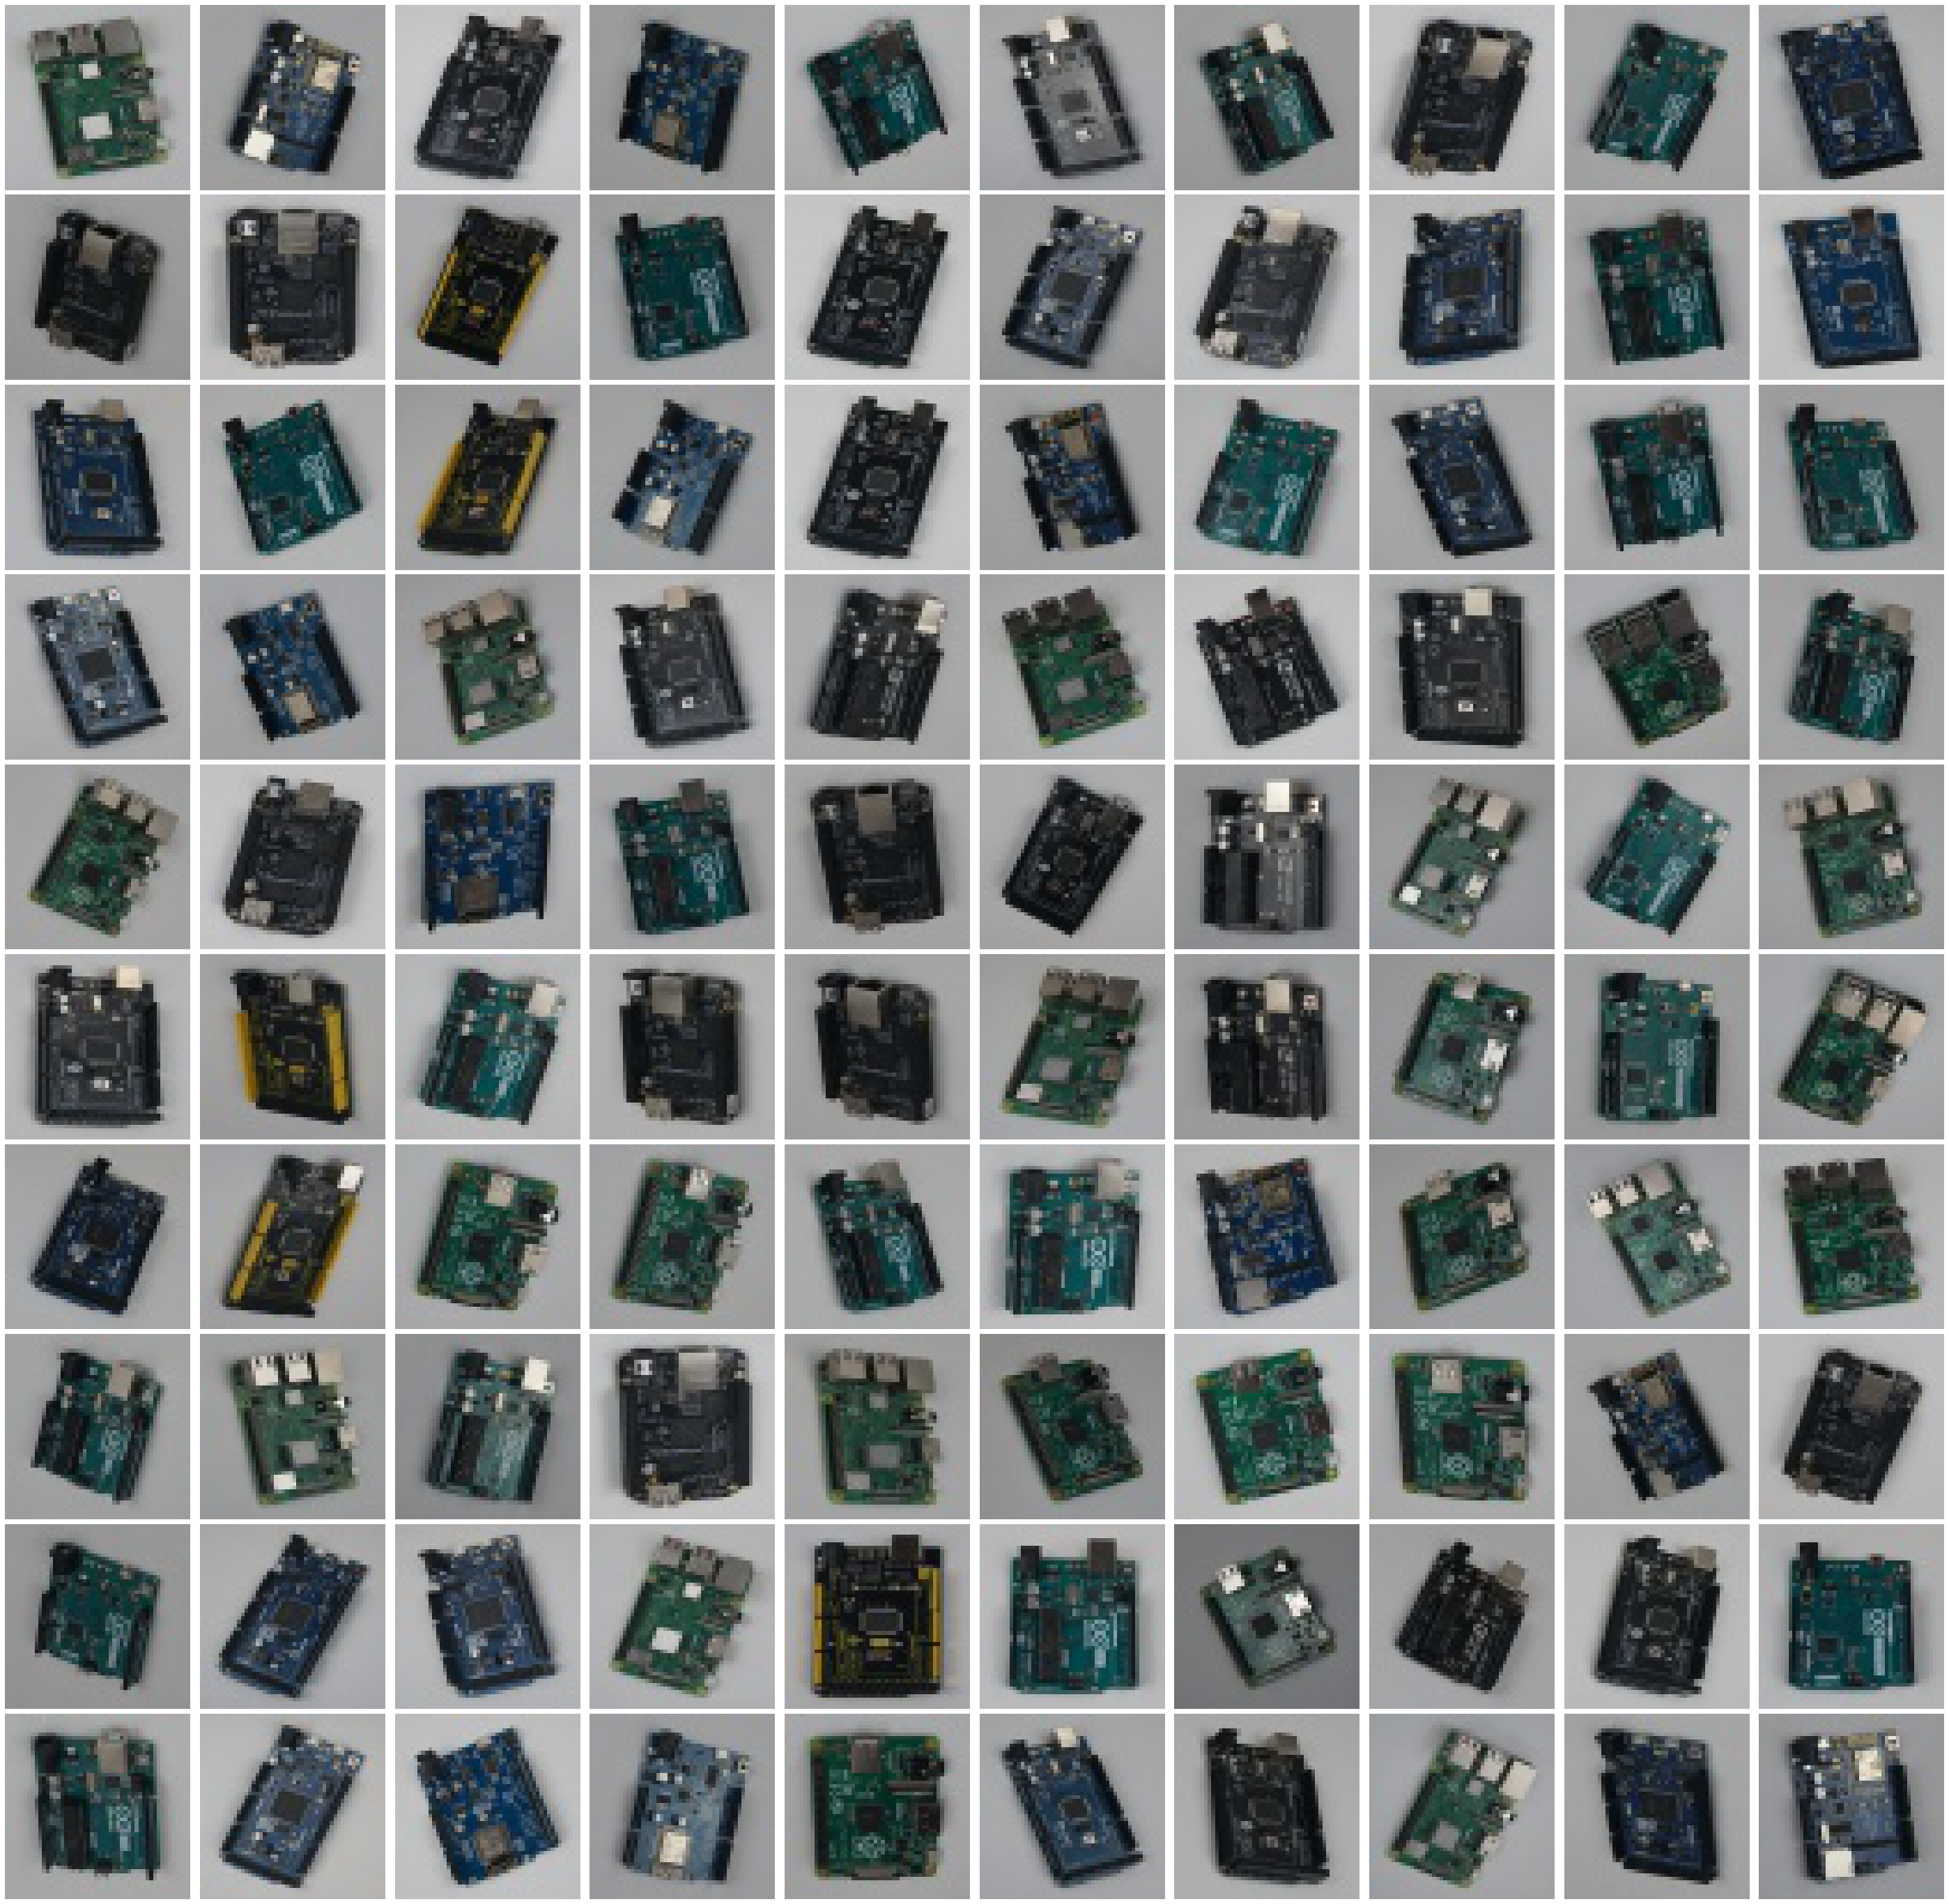

In [10]:
display100RandomData('dataset.mat')